# Logistic Regression with Python Part I

1. Logistic Regression을 하기전의 이론부분을 설명합니다. 

In [34]:
%pylab inline
import numpy as np
from matplotlib import pyplot as plt

Populating the interactive namespace from numpy and matplotlib


# Odds

odds라는 단어는 probability 와 유사하게 쓰이는 경우가 있고, 실제로 두개를 혼동해서 쓰는 경우가 있습니다. <br>
하지만 두개는 명벽하게 다른 의미를 갖고 있습니다. 

**Probability VS Odds**

1. **Probability(확률)**이란 $ \frac{성공횟수}{전체\ 시도\ 횟수} $

2. **Odds(승산)**이란 $ \frac{성공횟수}{실패횟수} $


**Euqal**

1. **Equal Odds** 는 1입니다. 즉 매번 1번 실패할때마다 1번 성공한다는 뜻입니다. **1:1**

2. **Equal Probabilities**는 0.5입니다. 2번 시도할때 1번 성공한다는 뜻입니다. 

**Range**

1. **Odds**는 **0~무한** 까지의 범위를 갖고 있으며, 1이상일 경우 성공확률이 실패확률보다 높다는 뜻입니다. 

2. **Probability**는 **0~1**까지의 범위를 갖고 있습니다. 


**Converting between Odds and Probability**

$$ Odds(Y) = \frac{Pr(Y=1)}{Pr(Y=0)} = \frac{Pr(Y=1)}{1-Pr(Y=1)} $$

$$ Pr(Y=1) = \frac{Odds(Y)}{1+Odds(Y)} = 1 - \frac{1}{1+Odds(Y)} $$

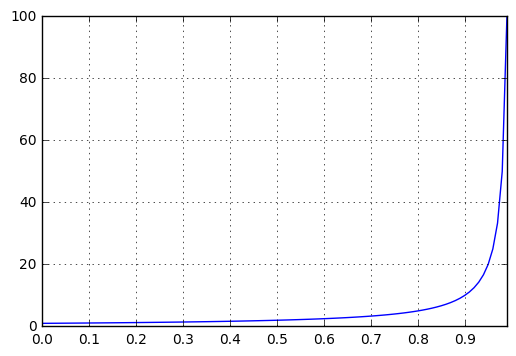

In [3]:
def odds(p):
    return 1./(1.-p)

x = np.arange(0, 1, 0.01)
y = odds(x)

plt.grid()
plt.xticks(np.arange(0, 1, 0.1))

plt.plot(x, y)

# Logit Function

odds에다가 log를 더해서 Linear Model 로 만든것이 Logit Function입니다. <br>
odds자체를 쓰면 0.9이후부터 값이 급격하게 늘어나는 것을 위의 그래프에서 볼수 있습니다. <br>
log를 씌워서 좀 더 Linear하게 값이 떨어지게 만든것이 Logit Function입니다. 

**Logistic Regression Model에서 log-odds는 Linear function으로 가정(assume)합니다.**

### $$ logit(p) = ln(\frac{1}{1 - p}) = w_0x_0 + w_1x_1 + ... + w_mx_m = \sum^n_{i=0} w_mx_m = w^Tx $$

<span class="text-muted">이때 $ w_0 $ 의 값은 bias값으로서 constant이며, $ x_0 $의 값은 1로 줍니다.<br>
즉 n의 값은 실제보다 +1 커지겠죠,. </span>

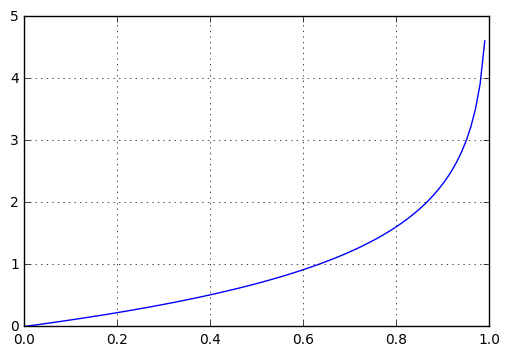

In [70]:
def logit(p):
    return np.log(1./(1.-p))
    
x = np.arange(0, 1, 0.01)
y = logit(x)

plt.grid()
plt.plot(x, y)

위의 공식에서 양변에 exp를 곱해주면 다음과 같이 됩니다.

### $$ \frac{1}{1-P} = exp \left( \sum^{n}_{i=0} w_ix_i \right) = \prod^n_{i=0} exp( w_ix_i ) $$

다음과 같은 공식들을 참고합니다.

* [Exponential Expansions 참고](http://www.math.com/tables/expansion/exp.htm)
* [Algebraic Proof of Sum of Exponential Powers is Product of Exponentials](http://math.stackexchange.com/questions/863576/algebraic-proof-of-sum-of-exponential-powers-is-product-of-exponentials)


공식 에 따르면...

### $$ e^x = \sum^{\infty}_{n=0} \frac{x^n}{n!} $$

exponent를 표현하는데 3가지 방법모두 동일한 결과를 내놓습니다.

In [68]:
def exp(x, N=30):
    return sum([x**n/np.math.factorial(n) for n in np.arange(N, dtype='float32')])
    
def exp2(data, N=15):
    return reduce(lambda a, b: a * b, [np.exp(wx) for wx in data])
    
print 'exp(sum(wx)): \t', exp(1)
print 'prod(exp(wx)):\t', exp2([0.1, 0.2, 0.3, 0.4])
print 'exponent:     \t', np.exp(1)
print

print 'exp(sum(wx)): \t', exp(3)
print 'prod(exp(wx)):\t', exp2([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.2])
print 'exponent:     \t', np.exp(3)

exp(sum(wx)): 	2.71828182846
prod(exp(wx)):	2.71828182846
exponent:     	2.71828182846

exp(sum(wx)): 	20.0855369232
prod(exp(wx)):	20.0855369232
exponent:     	20.0855369232


# Logistic function (Sigmoid function)

Logit function 의 inverse form으로서 0~1사이의 s-shape의 y값을 내놓습니다. (즉 확률로 사용가능하도록 바꿈) <br>
inverse시에는 logit을 확률로 바꾸는 $ Pr(Y=1) = \frac{exp(Y)}{1+exp(Y)} $ 공식 사용합니다.


## $$ \phi(z) = \frac{1}{1+e^{-z}} $$

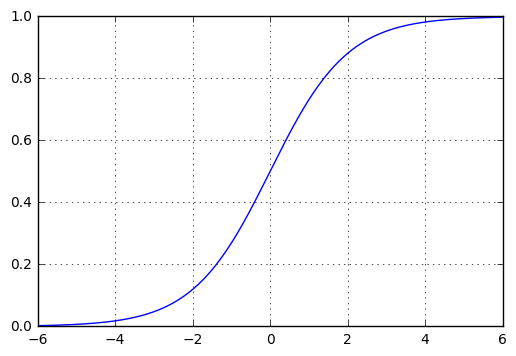

In [79]:
def logistic(z):
    return 1./(1. + np.exp(-z))

x = np.arange(-6, 6, 0.01)
y = logistic(x)

plt.grid()
plt.plot(x, y)

### References

* [The Simpler Derivation of Logistic Regression](http://www.win-vector.com/blog/2011/09/the-simpler-derivation-of-logistic-regression/)